In [11]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [14]:
Data_Path = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")

print(Data_Path)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y

#EDA

In [15]:
Data_Path.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [16]:
Data_Path.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39990,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,yes
39991,33,services,single,tertiary,no,1268,yes,no,cellular,3,jun,2219,1,no
39992,45,technician,married,secondary,no,406,yes,no,cellular,3,jun,240,1,no
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no
39994,35,management,married,tertiary,no,3109,yes,no,cellular,3,jun,467,1,no
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [18]:
Data_Path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [24]:
Data_Path.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

#Check if there's any Nulls or Outliers

In [21]:
Data_Path.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
Data_Path.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [26]:
Data_Path.count()

age          40000
job          40000
marital      40000
education    40000
default      40000
balance      40000
housing      40000
loan         40000
contact      40000
day          40000
month        40000
duration     40000
campaign     40000
y            40000
dtype: int64

In [55]:
Data_Path.median()

age          39.0
balance     407.0
day          17.0
duration    175.0
campaign      2.0
dtype: float64

In [54]:
Data_Path.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,no


In [28]:
Data_Path.min()

age                19
job             admin
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
y                  no
dtype: object

In [29]:
Data_Path.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
day               31
month            oct
duration        4918
campaign          63
y                yes
dtype: object

In [52]:
Data_Path.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [70]:
Data_Path[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']].describe()

,job,marital,education,default,housing,loan,contact,month
count,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11
top,blue-collar,married,secondary,no,yes,no,cellular,may
freq,9383,24386,20993,39191,24031,33070,24914,13532


In [40]:
Data_Path.values

array([[58, 'management', 'married', ..., 261, 1, 'no'],
       [44, 'technician', 'single', ..., 151, 1, 'no'],
       [33, 'entrepreneur', 'married', ..., 76, 1, 'no'],
       ...,
       [54, 'admin', 'divorced', ..., 170, 1, 'yes'],
       [34, 'management', 'married', ..., 342, 1, 'no'],
       [38, 'technician', 'married', ..., 113, 1, 'no']], dtype=object)

In [36]:
Data_Path.ndim

2

In [44]:
Data_Path['job'].head(40)

0       management
1       technician
2     entrepreneur
3      blue-collar
4          unknown
5       management
6       management
7     entrepreneur
8          retired
9       technician
10           admin
11           admin
12      technician
13      technician
14        services
15         retired
16           admin
17     blue-collar
18         retired
19        services
20     blue-collar
21      management
22     blue-collar
23        services
24         retired
25           admin
26      management
27    entrepreneur
28      management
29      technician
30      technician
31      management
32           admin
33     blue-collar
34      management
35      technician
36     blue-collar
37      technician
38           admin
39           admin
Name: job, dtype: object

In [45]:
Data_Path['job'].tail(40)

39960      technician
39961    entrepreneur
39962      management
39963     blue-collar
39964      management
39965         retired
39966      management
39967       housemaid
39968     blue-collar
39969     blue-collar
39970      management
39971      technician
39972      technician
39973      management
39974        services
39975     blue-collar
39976           admin
39977      unemployed
39978      technician
39979      management
39980      management
39981         student
39982         student
39983      management
39984           admin
39985      technician
39986      management
39987      technician
39988      management
39989      management
39990      technician
39991        services
39992      technician
39993      management
39994      management
39995      technician
39996      management
39997           admin
39998      management
39999      technician
Name: job, dtype: object

<AxesSubplot:xlabel='job', ylabel='count'>

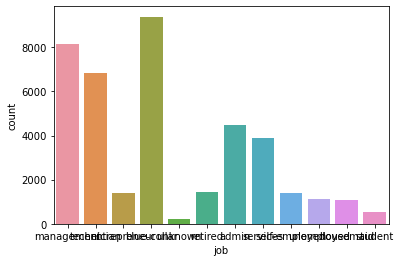

In [51]:
sns.countplot(x='job', data=Data_Path)

<AxesSubplot:xlabel='education', ylabel='count'>

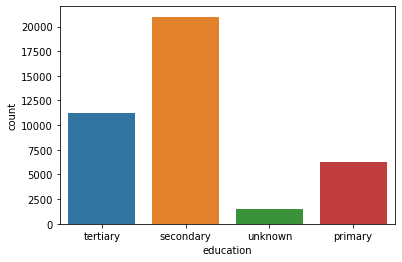

In [49]:
sns.countplot(x='education', data=Data_Path)

In [ ]:
Data_Path['job', #admin= 1,    #technican= 2, #management= 3, #          = 4, #        = 5, #         = 6, #retired = 0]

In [ ]:
Data_Path['matrial', #Married=2, #Single=1, #Divorced=0]

In [ ]:
Data_Path['education', #Primary=1, #Secondary=2, #tertiary=3, #Unknown=0]

In [ ]:
Data_Path['contact', #Celluar=2, #Telephone=1, #Unknown=0]

In [ ]:
Data_Path['default', #Yes=1, #No=0]

In [ ]:
Data_Path['housing', #Yes=1, #No=0]

In [ ]:
Data_Path['loan', #Yes=1, #No=0]

In [ ]:
Data_Path['month', #Jan=1, #Feb=2, #Mar=3, #Apr=4, #May=5, #Jun=6, #Jul=7, #Aug=8, #Sep=9, #Oct=10]

In [ ]:
Data_Path['Y', #Yes=1, #No=0]

#Encoding

#Correlation Cofficient

In [9]:
Data_Path.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


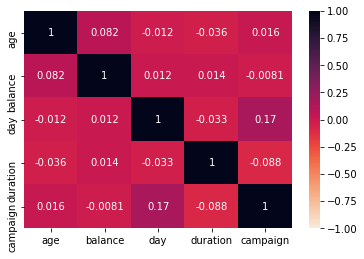

In [10]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

#Data Splitting & Labeling

In [ ]:
DataLabeling = Data_Path.values
x = DataLabeling[:, 1:] 
y = Data_Path['y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size= 0.2, random_state = 10)

In [ ]:
trainX.shape

In [ ]:
trainY.shape

In [ ]:
testX.shape

In [ ]:
testY.shape